<a href="https://colab.research.google.com/github/MohmedAAK/-Advanced-computer-vision-v1/blob/main/Advanced%20computer%20vision/team1/lec4_feature_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Harris Corner Detection

##fetch data

In [9]:
#download data
import os
import urllib.request
urllib.request.urlretrieve('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPsAAAD5CAYAAADhukOtAAAVkElEQVR4nO3da1DUBdvH8T3inlxad1fRRcVcxCSNLMesPEU4lhiyeRo2DzMqaFCZZjPVG3U8pCZaFsvUWOJiUShk41BEWlmagpqKaE65TLoNjbjEEsthkP09bx67iZvu+36eqWu97XfNXO98wdeLj7L/Gf0r7rvvPnC53Ft/FQMGDMCAAQNgs9lgtVq5XO4ttna7HXfeeScUTqcTTqcTOp0Ow4YNQ2pqKjIyMkQ3PT0dMTExUKvVUCgUYqtUKuF0OpGWlibePHv27Ig0q9VqxMXFYebMmRG5c2xsLFQqlWizVqvFwIEDMXfuXPHmadOmIS4uDkqlUrS560ZFRSEhIQGKG3/F9+7dG7Nnz8YHH3yAEydOiG1VVRXKysowduxYREVFiX/ju1wu7N+/X7z58OHDGDNmDHQ6nWhzr169MHXqVBw8eFC0+cSJEygrK8PEiROh1WpFm41GIyZPnoyjR4+iqqpKtPn999/HI488ElHser0ew4cP/z32nJwc1NTUQHLC4TD8fj9SUlLQq1cv0d8EjUaDzMxM+Hw+8eampiYkJyfDYDCIHz4jIwOBQEC0GQD8fj/S0tLE/1A3m81IT09Ha2srwuGwaHN1dTXcbrf4TzPETuzETuzELt1M7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MQuOsRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7KLNxN5liJ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YxZuJndiJndiJndiJndiJndiJndiJndiJndiJndiJndhFh9iJndiJndiJndiJndiJndiJndj//9izs7NRU1ODcDgsuleuXEFKSgp0Oh2USqXYajQaZGVl4dKlS6K9nZ2dv8Mu2XwD+7Vr1yJy57S0NPTq1Uu02Ww2w+Vy/YZdcrtil2zu+m65HrEvXrwY33zzDRoaGsQ2EAjg/PnzmD59Ovr16weLxSK2NpsNTz75JM6cOSPefOXKFUybNg39+/cXbe7fvz8WLFgAn88n2tzQ0IDz589j1qxZ6Nu3r2jzjTe41tXVIRAIiDYfO3YMCxcuhNVqFW2+7bbbfvuLpEfscXFxmDRpElJTU8V2+vTpmDt3LvLy8lBaWoqPPvpIbD/88ENs2rQJGRkZ4s0ulwsejwclJSWizSUlJcjNzcXjjz8u2pyamoo5c+bgtddeE7/z3r178eqrr2LGjBmYPn26aPO8efOwdetW7N+/X7S5uLgYq1atgtls7hm7RqOBXq+H0WgUXafTiQMHDqChoQHNzc1i29jYiDfeeAPDhw8X7TWZTLDb7SgrK0N9fb1o87Vr11BQUACHwyF+56FDh6K4uFj8znV1dXj//fdhsVjEm0ePHo1du3ahqalJtPnq1asoKCiAzWbrGXskHh4olUo4HA6Ul5ejra1N9OFJR0cH8vPzERcXJ95sMplQUVGBUCgk2tzS0oLCwkJYLBbxWzscDpSWlqK9vV20ORgMYt++feIPgBUKBRITE+H1etHZ2SnaHAqFUFRUBLvdTuwAsRM7sRM7sRM7sRM7sRM7sRM7sRM7sRM7sRM7sRM7sf/lQ+zETuzE/vfCbrPZYLPZoNVqiZ3Yif1Wxj5ixAiMGDFC/F9fETuxSw2x88d4Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid20WZi7zbETuzETuzETuzETuzETuzETuzETuzETuzETuySQ+zdhtiJndiJndiJndiJndiJndiJndiJndiJndiJXXKIvdsQO7ETO7ETO7Hf2thVKhXUajU0Go3oDho0CB9//DGam5vR0dEhti0tLfB4PBg6dKhor1arRXR0NMrLyxEMBkWbm5qa4PV6YbfbI3LnkpIShEIh0eZAIIDi4mIYjUbx5pEjR2L37t1oa2sTbQ4Gg9izZ88fY09MTMSsWbOQmZkputnZ2diyZQs8Hg/y8/PF1uPxYN26dcjJyRFvXrp0KbZs2YK8vDzx5o0bN2LZsmURufOmTZvE75yXl4eXX34ZWVlZ4s1PP/00NmzYINqbn5+P1157DYsXL0bv3r17xj5//nyUl5fD5/OJ7aVLl1BZWYmZM2di2LBhiIuLE9uhQ4fiqaeewpEjR8Sbz507B5fLheHDh4s2JyQkYNGiRTh9+rRos8/nQ2VlJdxuN+Lj40WbExMTMX/+fHz33Xe4dOmSaPOhQ4ewePFi3H777aLNgwcPht1uh1qt7hl7Tk4OampqRD9bhMNh+P1+pKSkiH+m0mg0yMzMhM/nE29uampCcnKy+H/0qdfrkZGRgUAgINoMAH6/H2lpaYiKihJtNpvNSE9PR2trK8LhsGhzdXU13G43VCqV+POCrjcndmIXHWIndmIndmIndmIndmIndmIndmIndmIndmIndmIndtFmYu8yxE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7s4s3ETuzETuzETuzETuzETuzETuzETuzETuzETuzETuyiQ+wRxp6UlISkpCQYjUZiF2wmdmIXx242m2E2m6FWq4ldsJnYiV0c+5gxYzBmzBiYTCZiF2wmdmIXx87P7MQuNcRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7KLNNy327OxsnDt3Dp2dnaJ7+fJlTJkyBXq9HiqVSmy1Wi2ysrJw6dIl0d7r168jGAwiOTkZRqNRtNlgMCAjIwP19fURuXNaWhp0Op1oc3R0NFwuF1paWsSbz549C7fbDbVaLdqsUqmgVCr/GPuSJUtw7Ngx/PLLL2Lb0NCACxcuIDU1FX379kV0dLTYWq1WLFu2DGfPnhVvvnLlCh599FHExMSINvfr1w/z589HbW2taPMvv/yCCxcuYObMmbDb7aLNsbGxmDNnDn7++Wc0NDSINh8/fhwLFiyAxWIRbY6OjobBYIBSqewZe0xMDJKSkjBu3DjRnTp1Kt555x18+eWXOHLkiNh+9dVX2Lp1K6ZNmybae//992PSpEnYtWsXvvjiC9HmL774Ajt27EBycnJE7vzmm2/i8OHDos2HDh1Cfn4+xo8fL96cnp6OHTt24OuvvxZtPnjwINauXQuLxdIzdrVajaioKOh0OtEdMmQIysrK0NjYiNbWVrH99ddfkZeXh2HDhon26vV6WK1WfPLJJ2hoaBBtbmhowO7duxETExORO+/duxfBYFC0+erVq/jggw9gNpvFm5OSklBQUIBQKCTaHAgE4PV6Ybfbe8YeiYcHSqUSDocD5eXlaGtrE3140tHRgfz8fMTFxYk3m0wmVFRUIBQKiTa3tLSgsLAQFotF/NYOhwOlpaVob28XbQ4Gg9i3b5/4A2CFQoHExER4vV50dnaKNodCIRQVFRH7jSF2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2YpccYu82xE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7skkPs3YbYiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiV1yiL3bEDuxEzuxEzuxEzuxEzuxEzuxEzuxEzuxEzuxSw6xdxtiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3bJIfZuQ+zE/rfFrtVqodfrYTQaxdZkMsHpdOLAgQMIBAJobm4W28bGRrzxxhu44447xJv79u2LsrIy1NfXizbX19ejoKAADodDtNloNMLpdKK4uBgNDQ2izXV1dSgqKkKfPn3Em0ePHo1du3ahqalJtPnq1avYtWsXbDbbP7DHx8cjPj4eOp0Od911F5544gk8/fTTortixQps3LgR27Ztw/bt28V227ZtWLt2LVauXCnevHz5cmzcuBG5ubmizbm5uVi3bh2WL18ekTtv2LBB/M65ublYv349nnnmGfHm5557DuvWrRNv3rx5MxYsWACTyfQP7P3790f//v0RFRUV8fezS7+3O5LvZ/f7/X/L97PPmjVL/M4Oh+O397NLN9+072fPyclBTU2N6GeLcDgMv9+PlJQU8c9UGo0GmZmZ8Pl84s1NTU1ITk6GwWAQbdbr9cjIyEAgEBBtBgC/34+0tDRERUWJNpvNZqSnp6O1tRXhcFi0ubq6Gm63GyqVSvx5QdebEzuxiw6xEzuxEzuxEzuxEzuxEzuxEzuxEzuxEzuxEzuxE7toM7F3GWIndmIndmIndmIndmIndmIndmIndmIndmIndmIndvFmYid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid20SF2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2YhdtJvYuQ+zETuzETuzETuzETuzETuzETuzETuz/Hnt2djaqq6vR2dkpttevX8fly5cxZcoU6PV6qFQqsY2KikJWVhZ++OEH8ebGxkY8/PDDMJlMos1GoxEZGRmor68Xbe7s7MTly5cxY8YM6HQ60ebbbrsNLpcLoVAI169fF20+e/Ys3G43NBqNaPON/UPs8+fPx6effora2lqx9fl8qKysxOOPP474+HgMHjxYbIcOHYqnnnoKR48eFW+uqamBy+VCQkKCaHNCQgIWLVqEM2fOiDbX1taisrISbrcbTqdTtHnEiBGYN28eLl68CJ/PJ9p86NAhLF68GEOGDBFtHjRoEOx2O9Rqdc/YbTYbhg8fjqSkJNGdNGkSvF4vKisrcerUKbGtqqpCbm4uUlJSRHvvvvtujB07Fnv27MGxY8dEm48fP468vDw88MAD4neePHky3n77bVRVVYk2HzlyBG+99RbGjBkj3jxt2jTk5eXh5MmTos1Hjx7Fpk2bYLFYesauUqmgVquh0WjEVqvVYtCgQfj444/R3NyMjo4OsW1tbYXH44HT6RRvjo6OxqeffopgMCja3NTUBK/XC7vdLtqs0WgwaNAglJSUIBQKiTYHAgEUFxfDaDSKN48aNQq7d+9Ge3u7aHMwGMSePXtgt9t7xh6JhwdKpRIOhwPl5eVoa2sTfXjS0dGB/Px8xMXFiTebTCZUVFQgFAqJNre0tKCwsBAWi0X81g6HA6WlpWhvbxdtDgaD2Ldvn/gDYIVCgcTERHi9XnR2doo2h0IhFBUVEfuNIXZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3Zilxxi7zbETuzETuzETuy3HvYBAwZgwIAB4v84gdiJXWqI/X+xO51OOJ1O6HQ6Yid2Yr+VsfPHeGIndmIndmIndmIndmIndmIndmIndmIndmIndpkh9m5D7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MQuOcTebYid2Imd2Imd2Imd2Imd2Imd2Imd2Imd2Imd2CWH2LsNsRM7sRM7sRP7rY3dYDDAZrMhJiZGdEeNGoWSkhL8+OOPqKurE1u/348dO3Zg9OjR4s1DhgzBhx9+iNraWtHm2tpa7Ny5E8OGDRNvHjlyJN59911cvnxZtPn7779HYWEhBg4cKN58//33Y+fOnfjpp59Em30+H/Lz82G1WnvGfs8992DJkiV44YUXRPfFF1/E2rVrsX79evFdvXo1Xnrppb9V85o1a/Diiy9GpHnNmjXivevWrcOaNWvEe1944QW89NJLEWlevXo15s6dC6PR2DP2ZcuW4fTp02hvbxfbtrY21NbWYurUqTCZTNBqtWKr1+uxdOlSXLx4Ubw5EAhgypQpiI6OFm02m81wu92oq6sTbW5vb0dtbS3S09NhNBpFm61WK2bOnIlgMIi2tjbR5tOnT2PevHnQ6XSizVqtFhqNBgqFomfsOTk5qKmpEf1sEQ6H4ff7kZKSIv6ZSqPRIDMzEz6fT7y5qakJycnJMBgMos16vR4ZGRkIBAKizQDg9/uRlpYm/j8Zm81mpKeno7W1FeFwWLS5uroabrcbKpVK/HlB15sTO7GLDrETO7ETO7ETO7ETO7ETO7ETO7ETO7ETO7ETO7ETu2gzsXcZYid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid28WZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3bRIXZiJ3ZiJ3ZiJ3ZiJ/Y/DbvVaoXVaoVGoyF2wWZiJ3Zx7ImJiUhMTITBYCB2wWZiJ3Zx7PwxntilhtiJndiJndiJndiJndiJndiJndiJndiJndiJ/Z+wZ2VlEbvQXLlyJWLYXS4XsXfF7nK54PV6cfjwYdE9cOAAFi5ciIkTJ+LBBx8U2wkTJmDFihXYv3+/ePNnn32GBQsWYPLkyaLNkydPRnZ2NsrLyyNy58zMTPE7JycnIysrC59//rl4c3FxMXJycjB+/HjR5nHjxiEhIeG3F5j+E3ar1Yr4+HiMHDlSdCdMmIDCwkKcPHkSZ86cEdtTp05h27ZteOihh8Sb7733Xrz77ruoqqoSba6qqoLH48F9990XkTu//fbb4nc+duwYdu7cidGjR4s3P/LII/B4PDh9+rRo8/Hjx7F582ZYLJaesSsUCiiVStFVqVSIjY3FJ598gpaWFoTDYbFtb2+Hx+PBkCFDxJt79+6NiooKNDc3izY3NzejsLAQffr0Eb91bGwsSktLf/txWmobGxuxd+9e6HQ6qFQq0eY777wTXq8XHR0d4nd+7733YLfb/xi79CqVSjgcDpSXl6OtrU3081RHRwfy8/MRFxcn3mwymVBRUYFQKCTa3NLSgsLCQlgsFvFbOxwOlJaWor29XbQ5GAxi37594s+EFAoFEhMT4fV60dnZKdocCoVQVFRE7DeG2Imd2Imd2Imd2Imd2Imd2Imd2Imd2Imd2Ildcoi92xA7sRM7sRM7sRM7sRM7sRM7sRM7sRM7sRM7sUsOsXcbYid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2ySH2bkPsxE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7sxC45xN5tiJ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YJYfYuw2xEzuxC3/j9+vXD++88w5qamrw/fffi+2FCxewdu1axMbGijcbDAYUFBSgurpatLm6uhpbt25FdHS0+K379esHj8eD8+fPizZ/++23eP3118VfFa1QKBAfH49XXnkFFy9eFG0+e/Ystm/fjj59+tw82BUKBUwmE2bNmoUVK1bg+eefF9vnnnsOU6ZMicg3vlarxZw5c/Dss8+KNj/77LNITU2FTqeLyJ3T09OxcuVK0eZnnnkGM2bMgFqtFm+22WxITU3FqlWrxO/82GOPQa/X94xdpVJFdNVq9b/d//TX/af7V3TceFPrn9H7V+z/5WuMxI273uVmv/Wf3f1X9Op0ut9jj46OhsFggNlsvqlXp9PBZDJF/Ov4o+3duzd69eoV8a/jX63JZIJer4/41/Gv1mg0/ld8PxoMhpv+6zQYDEhISMD/AISD1xm5PZTtAAAAAElFTkSuQmCC', 'google.png')

('google.png', <email.message.Message at 0x7f5f574aa390>)

Capture_1.PNG

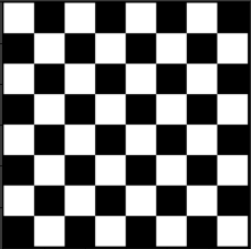

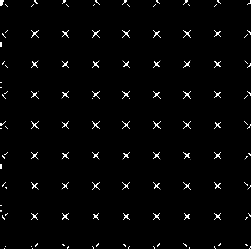

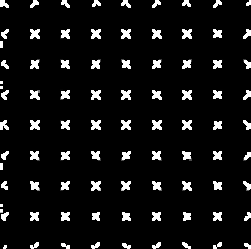

50481756.160000004


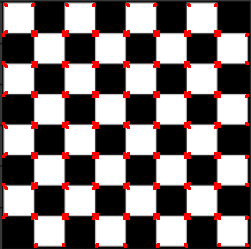

In [25]:
# corner detection with
# Harris Corner Detection Method
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# path to input image specified and
# image is loaded with imread command
image = cv2.imread('google.png')
cv2_imshow( image)
# convert the input image into
# grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(operatedImage)

# apply the cv2.cornerHarris method

#blocksize :It is the size of neighbourhood considered for corner detection
#ksize :Aperture parameter for the Sobel operator.
#k :Harris detector free parameter in the equation.

#                            image    blocksize    ksize       k
dest = cv2.cornerHarris(operatedImage,    2    ,     5     ,  0.07)
cv2_imshow( dest)
# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)
cv2_imshow( dest)
print(0.01 * dest.max())
# Reverting back to the original image,
# with optimal threshold value
image[dest > 0.01 * dest.max()]=[0, 0, 255]

# the window showing output image with corners
cv2_imshow( image)



refrences

http://www.opencv.jp/opencv-2.2_org/py/imgproc_feature_detection.html#:~:text=aperture_size%28int%29%20%E2%80%93%20Aperture%20parameter%20for%20the%20Sobel%20operator,pixel%2C%20i.e.%20in%20terms%20of%20the%20previous%20function.

https://cppsecrets.com/users/38349798104105103117112116975748565564103109971051084699111109/Harris-Corner-cv2cornerHarris.php

https://www.geeksforgeeks.org/python-corner-detection-with-harris-corner-detection-method-using-opencv/

https://docs.opencv.org/4.x/db/df6/tutorial_erosion_dilatation.html

https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345